IA & Data science (LU3IN0226) -- 2023-2024
--------
*&copy; Equipe pédagogique: Téo Guichoux, Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# TD-TME10: apprentissage supervisé appliqué à un dataset

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Abdallah Nassur, Lin-Jie Wu

Le nom de chaque membre du binôme doit être indiqué, et **un seul rendu sur un des deux comptes Moodle doit être fait**.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *tme-10-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Le compte-rendu est soumis sur la page Moodle.**

# TDTME 10 - mini-projet 2024


<font size="+1" color="RED"><b>Date de rendu : lundi 29 avril 2024, avant 19h</b></font>
    
<b>Attention!</b> les soumissions après lundi 29 avril 19h se verront appliquer un malus dans la note:
- retard de moins d'une heure : 0 malus
- retard entre 1h et 24h : malus de 2pts
- retard entre 24h à 48h : malus de 5pts
- retard supérieur à 48h : noté 0.


## Travail à faire

Appliquer les algorithmes d'**apprentissage supervisé** vus depuis le début du semestre sur les données afin de mettre en évidence des résultats intéressants (temps d'exécution, taux de bonne classification,...).
Vous devez utiliser tout ce qui a été fait dans les séances de TDTME 1 à 8 et vous devez comparer les algorithmes suivantes:
- les k plus proches voisins
- le perceptron (n'importe quelle variante)
- les arbres de décision

Votre comparaison doit utiliser une validation croisée.


## Travail à rendre

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage.

Ce qui doit être remis : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et **seulement** les fichiers demandés.

**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb

Les données seront chargées par les commandes de chargement des données fournies dans ce notebook (ci-dessous).

Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.



In [1]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads2 as iads2

# importation de Classifiers
from iads2 import Classifiers as classif

# importation de utils
from iads2 import utils as ut

# importation de evaluation
from iads2 import evaluation as ev

# importation de Clustering
from iads2 import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Données pour le projet : Pen-Based Recognition of Handwritten Digits

documentation: <a href="https://archive.ics.uci.edu/dataset/81/pen+based+recognition+of+handwritten+digits" target="NEW">page UCI</a> (mais l'essentiel est donné ci-après).

Pour télécharger les données, la façon la plus simple est d'installer la librairie de l'UCI:

    pip install -U ucimlrepo

ensuite, on peut lancer la boîte suivante.


In [ ]:
#!pip install -U ucimlrepo

### Chargement des données

In [2]:
from ucimlrepo import fetch_ucirepo,list_available_datasets

# check which datasets can be imported
#list_available_datasets()

# import dataset
pen_dataset = fetch_ucirepo(id=81)

# access data
X = pen_dataset.data.features
y = pen_dataset.data.targets

# access metadata
print(pen_dataset.metadata.uci_id)
print(pen_dataset.metadata.num_instances)
print(pen_dataset.metadata.additional_info.summary)

# access variable info in tabular format
print(pen_dataset.variables)

81
10992
We create a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format.

We use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds. 

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution.  Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to wr

In [3]:
X

Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0              47         100          27          81          57          37   
1               0          89          27         100          42          75   
2               0          57          31          68          72          90   
3               0         100           7          92           5          68   
4               0          67          49          83         100         100   
...           ...         ...         ...         ...         ...         ...   
10987          36         100          24          70           0          38   
10988          16          75          41         100          52          64   
10989          56         100          27          79           0          39   
10990          19         100           0          61           3          23   
10991          38         100          37          81          12          55   

       Attribute7  Attribute8  Attribute9  Attribute10  Attribute11  \
0              26           0           0           23           56   
1              29          45          15           15           37   
2             100         100          76           75           50   
3              19          45          86           34          100   
4              81          80          60           60           40   
...           ...         ...         ...          ...          ...   
10987          49          33          95           47           87   
10988          32          27           0            0           21   
10989          12           0          66           15          100   
10990          48           0          97           27          100   
10991           0          28          52           27          100   

       Attribute12  Attribute13  Attribute14  Attribute15  Attribute16  
0               53          100           90           40           98  
1                0           69            2          100            6  
2               51           28           25           16            0  
3               45           74           23           67            0  
4               40           33           20           47            0  
...            ...          ...          ...          ...          ...  
10987           55           96           21          100            0  
10988            9           62            2          100           14  
10989           51           93           93           38           93  
10990           66           62           97           10           81  
10991           42           86           26           65            0  

[10992 rows x 16 columns]

In [4]:
y

Class
0          8
1          2
2          1
3          4
4          1
...      ...
10987      4
10988      2
10989      0
10990      0
10991      4

[10992 rows x 1 columns]

In [5]:
np.unique(y.Class)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

## Expérimentations

*Réflexion préalable :*

Reconnaissance des chiffres manuscrits basée sur un stylo.

Il y'a 16 attributs formant 8 paires de coordonnées. Une fois ces 8 points reliés, ils représentent un chiffre manuscrit.

Dataset multi-classes (10 labels), correspondant aux chiffres de 0 à 9.

Objectif : pouvoir identifier le chiffre écrit à partir de ses coordonnées.

Comment comparer les différents modèles ? 

    - temps d'éxecution (apprentissage et prédiction)
    - taux de bonne classification (accuracy avec validation croisée)
        - évolution de la précision en fonction de la répartition des data entre train et test
    - rapport précision/vitesse
    

In [6]:
# Copie de notre dataset et labels
Xdata = np.array(X.copy())
Ydata = np.array(y.copy())

# Passer du dataframe à des arrays:
Xdata = np.array(X[['Attribute1', 'Attribute2','Attribute3','Attribute4','Attribute5','Attribute6','Attribute7','Attribute8','Attribute9','Attribute10','Attribute11','Attribute12','Attribute13','Attribute14','Attribute15', 'Attribute16']])
Ydata = np.array(y['Class'])

# obtenir les noms des colonnes :
attributs = ['Attribute1', 'Attribute2','Attribute3','Attribute4','Attribute5','Attribute6','Attribute7','Attribute8','Attribute9','Attribute10','Attribute11','Attribute12','Attribute13','Attribute14','Attribute15', 'Attribute16']


### Première approche avec K plus proches voisins

In [7]:
np.random.seed(42)   # on prend 42 comme graine

# Nombre d'itérations voulues pour la validation croisée:
nb_iter = 3

print("ATTENTION: cela peut être long !\n")

# 1) créer le classifieur de base
# Création d'un classifier KNN
classKNN = classif.ClassifierKNN(16,5)  # 16 dimensions car 16 attributs

# 2) créér le classifieur multi-classes

# Création de son équivalent multiclasses (car ce dataset en a 10)
multiclassKNN = classif.ClassifierMultiOAA(classKNN)
# ######################## 

# Remarque: ici, on ne mélange pas les exemples avant la validation croisée A FAIRE

# Evaluation du classifieur par validation croisée:
tic = time.time()  # On lance le chrono
perf, taux_moyen, taux_ecart = ev.validation_croisee(multiclassKNN, (Xdata, Ydata), nb_iter)
toc = time.time()  # On arrête le chrono

# Récupération des performances pour le KNN
perfKNN = perf
perfMoyenneKNN = taux_moyen
ecartKNN = taux_ecart
tempsKNN = toc-tic

print(f'Temps passe: {(toc-tic):0.4f} secondes.')
print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}')


ATTENTION: cela peut être long !

Iteration :  0 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.990174672489083
Iteration :  1 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9893558951965066
Iteration :  2 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9773471615720524
Temps passe: 379.2189 secondes.
Analyse perf: moyenne: 0.9856	ecart: 0.0059


### Perceptron

#### Version Biaisée

In [8]:
np.random.seed(42)   # on prend 42 comme graine
#CALCULER TEMPS DE CONVERGENCE EN FONCTION D'EPS
# Paramètres pour le perceptron:
dim = Xdata.shape[1]   # la dimension est donnée par le nombre de colonnes de Xdata
eps = 0.00001    # learning rate
poids_0 = True   # valeur initiale des poids à 0

# Nombre d'itérations voulues pour la validation croisée:
nb_iter = 3

print("ATTENTION: cela peut être long !\n")

# ######################## A COMPLETER CI-DESSOUS
# 1) créer le classifieur de base

classBiais = classif.ClassifierPerceptronBiais(dim, eps, poids_0)

# 2) créér le classifieur multi-classes

multiclassBiais = classif.ClassifierMultiOAA(classBiais)

#multiclassBiais.train(Xdata, Ydata)

# ######################## 

# Remarque: ici, on ne mélange pas les exemples avant la validation croisée

# Evaluation du classifieur par validation croisée:
tic = time.time()  # On lance le chrono
perf, taux_moyen, taux_ecart = ev.validation_croisee(multiclassBiais, (Xdata, Ydata), nb_iter)
toc = time.time()  # On arrête le chrono

# Récupération des performances pour le Perceptron Biais
perfBiais = perf
perfMoyenneBiais = taux_moyen
ecartBiais = taux_ecart
tempsBiais = toc-tic

print(f'Temps passe: {(toc-tic):0.4f} secondes.')
print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}')



ATTENTION: cela peut être long !

Iteration :  0 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9110262008733624
Iteration :  1 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.8741812227074236
Iteration :  2 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.8700873362445415
Temps passe: 180.1408 secondes.
Analyse perf: moyenne: 0.8851	ecart: 0.0184


#### Version de Base

In [9]:
np.random.seed(42)   # on prend 42 comme graine
#CALCULER TEMPS DE CONVERGENCE EN FONCTION D'EPS
# Paramètres pour le perceptron:
dim = Xdata.shape[1]   # la dimension est donnée par le nombre de colonnes de Xdata
eps = 0.001    # learning rate
poids_0 = True   # valeur initiale des poids à 0

# Nombre d'itérations voulues pour la validation croisée:
nb_iter = 3

print("ATTENTION: cela peut être long !\n")

# ######################## A COMPLETER CI-DESSOUS
# 1) créer le classifieur de base

classP = classif.ClassifierPerceptron(dim, eps, poids_0)

# 2) créér le classifieur multi-classes

multiclassP = classif.ClassifierMultiOAA(classP)

#multiclassBiais.train(Xdata, Ydata)

# ######################## 

# Remarque: ici, on ne mélange pas les exemples avant la validation croisée

# Evaluation du classifieur par validation croisée:
tic = time.time()  # On lance le chrono
perf, taux_moyen, taux_ecart = ev.validation_croisee(multiclassP, (Xdata, Ydata), nb_iter)
toc = time.time()  # On arrête le chrono

# Récupération des performances pour le Perceptron Biais
perfP = perf
perfMoyenneP = taux_moyen
ecartP = taux_ecart
tempsP = toc-tic

print(f'Temps passe: {(toc-tic):0.4f} secondes.')
print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}')



ATTENTION: cela peut être long !

Iteration :  0 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.8736353711790393
Iteration :  1 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.8916484716157205
Iteration :  2 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.8485262008733624
Temps passe: 96.6835 secondes.
Analyse perf: moyenne: 0.8713	ecart: 0.0177


### Arbres de décision numériques

Cet arbre possède  362  feuilles.


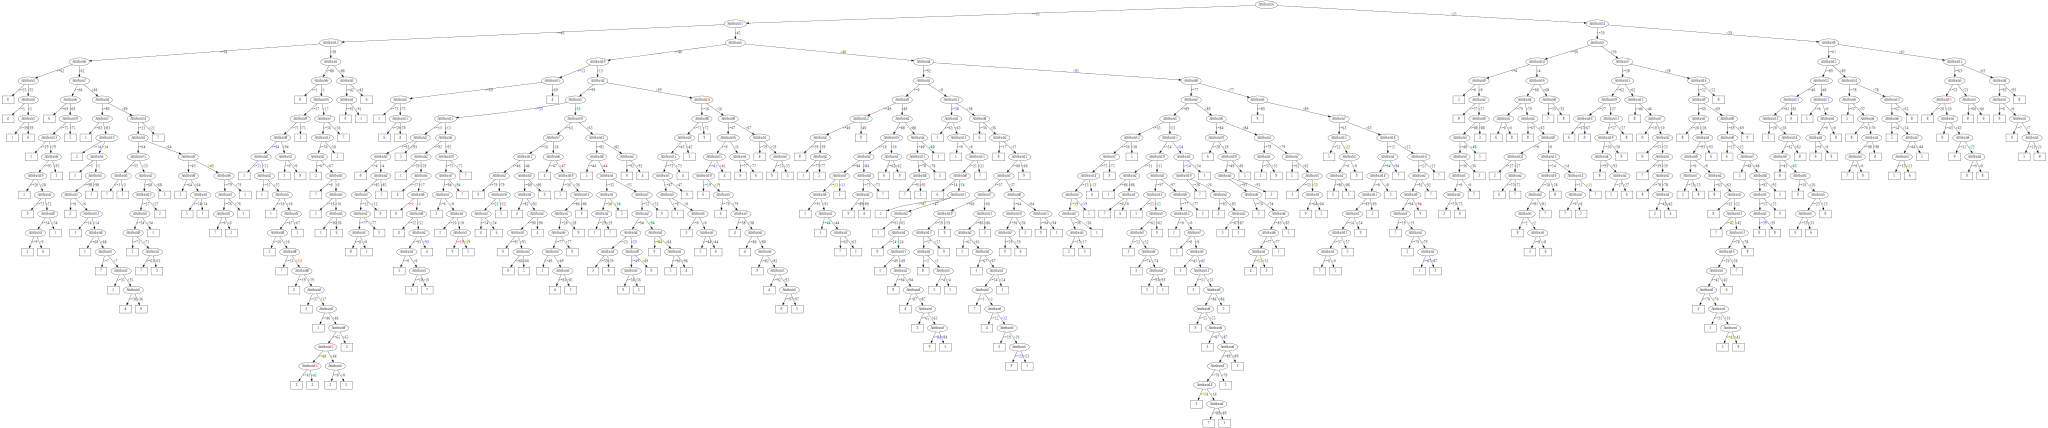

In [10]:
# Représentation de l'arbre de décision lorsque qu'il apprend l'intégralité du dataset

import graphviz as gv

seuil = 0.0

# Initialiation d'un arbre pour le dataset :
arbre = classif.ClassifierArbreNumerique(len(attributs), seuil, attributs)

# Construction de l'arbre de décision à partir du dataset entier 
arbre.train(Xdata,Ydata)

# Construction de la représentation graphique (affichage)
graphe_arbre = gv.Digraph(format='png')
arbre.affiche(graphe_arbre)

# Affichage du graphe obtenu:
print("Cet arbre possède ",arbre.number_leaves()," feuilles.")
graphe_arbre

In [11]:
np.random.seed(42)   # on prend 42 comme graine

# Nombre d'itérations voulues pour la validation croisée:
nb_iter = 3

print("ATTENTION: cela peut être long !\n")

# évalution du modèle avec la validation croisée
tic = time.time()  # On lance le chrono
(res_all, res_moy, res_sd) = ev.validation_croisee(arbre, (Xdata, Ydata), nb_iter)
toc = time.time()  # On arrête le chrono

# Récupération des performances pour l'arbre de décision numérique
perfArbre = res_all
perfMoyenneArbre = res_moy
ecartArbre = res_sd
tempsArbre = toc-tic

# ################### 
print(f'\nTemps passe: {(toc-tic):0.4f} secondes.')
print("\nValidation croisée sur les données avec comme seuil ",seuil)
print("Perf obtenues : ",res_all)
print(f'\nAccuracy moyenne: {res_moy:.3f}\técart type: {res_sd:.3f}')


ATTENTION: cela peut être long !

Iteration :  0 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9440502183406113
Iteration :  1 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9445960698689956
Iteration :  2 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9042030567685589

Temps passe: 37.2606 secondes.

Validation croisée sur les données avec comme seuil  0.0
Perf obtenues :  [0.9440502183406113, 0.9445960698689956, 0.9042030567685589]

Accuracy moyenne: 0.931	écart type: 0.019


### Comparaison des modèles

#### Vitesse des modèles

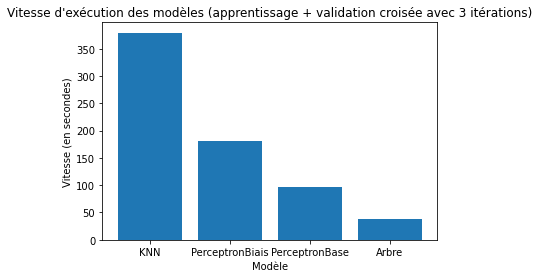

vitesses moyennes : 
	KNN: 379.2189 secondes.
	PerceptronBiais: 180.1408 secondes.
	PerceptronP: 96.6835 secondes.
	Arbre: 37.2606 secondes.


In [12]:
# Vitesse des modèles (apprentissage + validation croisée avec 10 itérations)

# Histogramme avec les 4 modèles
modeles = ['KNN', 'PerceptronBiais', 'PerceptronBase', 'Arbre']
vitesses = [tempsKNN, tempsBiais, tempsP, tempsArbre]  # Valeurs associées à chaque catégorie

# Création de l'histogramme
plt.bar(modeles, vitesses)

# Ajout de labels et de titres
plt.xlabel('Modèle')
plt.ylabel('Vitesse (en secondes)')
plt.title("Vitesse d'exécution des modèles (apprentissage + validation croisée avec 3 itérations)")

# Affichage de l'histogramme
plt.show()

#-------------------------------

print("vitesses moyennes : ")
print(f'\tKNN: {(tempsKNN):0.4f} secondes.')
print(f'\tPerceptronBiais: {(tempsBiais):0.4f} secondes.')
print(f'\tPerceptronP: {(tempsP):0.4f} secondes.')
print(f'\tArbre: {(tempsArbre):0.4f} secondes.')

Observation : pour une validation croisée de 3 itérations, KNN (5 voisins) est beaucoup plus long que les autres modèles.

#### Performances des modèles

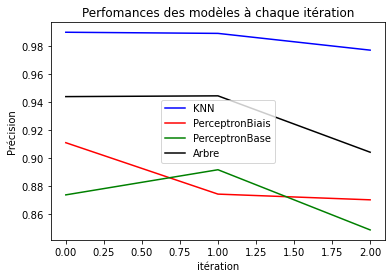

In [13]:
# Courbes des performances de chaque modèle
x1 = [i for i in range (3)]

y1 = perfKNN

y2 = perfBiais

y3 = perfP

y4 = perfArbre

# Tracer la courbe
plt.plot(x1, y1, color='blue', label='KNN')
plt.plot(x1, y2, color='red', label='PerceptronBiais')
plt.plot(x1, y3, color='green', label='PerceptronBase')
plt.plot(x1, y4, color='black', label='Arbre')

# Ajouter un titre
plt.title('Perfomances des modèles à chaque itération')

# Ajouter des étiquettes aux axes
plt.xlabel('itération')
plt.ylabel('Précision')

# Ajouter une légende
plt.legend()

# Afficher la courbe
plt.show()

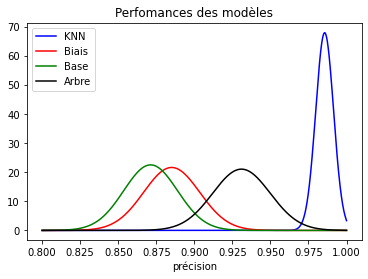

In [14]:
# Visualition de la performance (moyenne et dispersion) des modèles (loi normale)

from scipy.stats import norm

# Générer des valeurs pour l'axe des x
x = np.linspace(0.8, 1, 1000)

# Calculer les valeurs de la densité de probabilité pour chaque valeur de x
y1 = norm.pdf(x, perfMoyenneKNN, ecartKNN)
y2 = norm.pdf(x, perfMoyenneBiais, ecartBiais)
y3 = norm.pdf(x, perfMoyenneP, ecartP)
y4 = norm.pdf(x, perfMoyenneArbre, ecartArbre)

# Tracer la courbe de densité de probabilité
plt.plot(x, y1, color='blue', label='KNN')
plt.plot(x, y2, color='red', label='Biais')
plt.plot(x, y3, color='green', label='Base')
plt.plot(x, y4, color='black', label='Arbre')

# Ajouter un titre
plt.title('Perfomances des modèles')

# Ajouter des étiquettes aux axes
plt.xlabel('précision')

# Ajouter une légende
plt.legend()

# Afficher la courbe
plt.show()

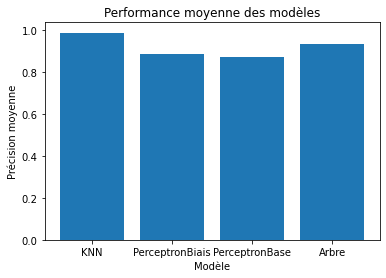

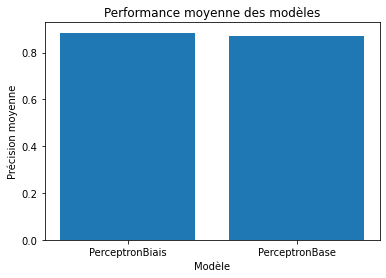

performances moyennes : 
	KNN: 0.9856 
	PerceptronBiais: 0.8851 
	PerceptronP: 0.8713 
	Arbre: 0.9309 


In [15]:
# Performance moyenne de chaque modèle

# Histogramme avec les 4 modèles
modeles = ['KNN', 'PerceptronBiais', 'PerceptronBase', 'Arbre']
perfsMoy = [perfMoyenneKNN, perfMoyenneBiais, perfMoyenneP, perfMoyenneArbre]  # Valeurs associées à chaque catégorie

# Création de l'histogramme
plt.bar(modeles, perfsMoy)

# Ajout de labels et de titres
plt.xlabel('Modèle')
plt.ylabel('Précision moyenne')
plt.title("Performance moyenne des modèles")

# Affichage de l'histogramme
plt.show()

###################################

# Histogramme avec PerceptronBiais et Base 
modeles = ['PerceptronBiais', 'PerceptronBase']
perfsMoy = [perfMoyenneBiais, perfMoyenneP]  # Valeurs associées à chaque catégorie

# Création de l'histogramme
plt.bar(modeles, perfsMoy)

# Ajout de labels et de titres
plt.xlabel('Modèle')
plt.ylabel('Précision moyenne')
plt.title("Performance moyenne des modèles")

# Affichage de l'histogramme
plt.show()

print("performances moyennes : ")
print(f'\tKNN: {(perfMoyenneKNN):0.4f} ')
print(f'\tPerceptronBiais: {(perfMoyenneBiais):0.4f} ')
print(f'\tPerceptronP: {(perfMoyenneP):0.4f} ')
print(f'\tArbre: {(perfMoyenneArbre):0.4f} ')

Observation : KNN(5) et l'arbre se démarquent sur le plan de la précision avec une validation croisée à 3 itérations.

PerceptronBiais et Base n'ont pas une différence significative de précision.

#### Efficacité (Performance par rapport à la vitesse d'éxecution)

Quel le modèle offre le meilleur (rapport précision moyenne/vitesse de validation croisée (3 itérations)) ?

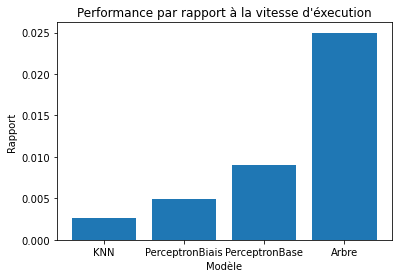

Efficacités : 
	KNN: 0.00260 
	PerceptronBiais: 0.00491 
	PerceptronP: 0.00901 
	Arbre: 0.02498 


In [16]:
rapportKNN = perfMoyenneKNN / tempsKNN
rapportBiais = perfMoyenneBiais / tempsBiais
rapportP = perfMoyenneP / tempsP
rapportArbre = perfMoyenneArbre / tempsArbre

# Histogramme avec les 4 modèles
modeles = ['KNN', 'PerceptronBiais', 'PerceptronBase', 'Arbre']
rapport = [rapportKNN, rapportBiais, rapportP, rapportArbre]  # Valeurs associées à chaque catégorie

# Création de l'histogramme
plt.bar(modeles, rapport)

# Ajout de labels et de titres
plt.xlabel('Modèle')
plt.ylabel('Rapport')
plt.title("Performance par rapport à la vitesse d'éxecution")

# Affichage de l'histogramme
plt.show()

print("Efficacités : ")
print(f'\tKNN: {(rapportKNN):0.5f} ')
print(f'\tPerceptronBiais: {(rapportBiais):0.5f} ')
print(f'\tPerceptronP: {(rapportP):0.5f} ')
print(f'\tArbre: {(rapportArbre):0.5f} ')

Observation : 
    
L'arbre de décision offre le meilleur compromis entre précision de ses prédictions et vitesse de réalisation de l'apprentissage/tests.

Bien que KNN possède la plus grande précision, il souffre d'un temps d'éxecution considérablement plus longue que les autres modèles, faisant de lui le moins efficace des modèles.

IMPORTANT : ces observations ne valent que pour des paramètres fixés : 
    
    - KNN : 5 voisins 
    - Perceptron(Biais et Base) : learning rate à 10e-5
    - Arbre : seuil à 0.0
    - validation croisée de chaque modèle à 3 itérations
    
Il faut donc faire varier ces paramètres afin d'identifier le modèle le plus approprié à notre base de données.

### Représentation des chiffres manuscrits 

In [17]:
def represente(idx) : 
    for i in range (0, 13, 2) : 
        x0 = X.iloc[idx][i]
        y0 = X.iloc[idx][i+1]
        x1 = X.iloc[idx][i+2]
        y1 = X.iloc[idx][i+3]
        plt.plot([x0,x1],[y0,y1])
    plt.show()

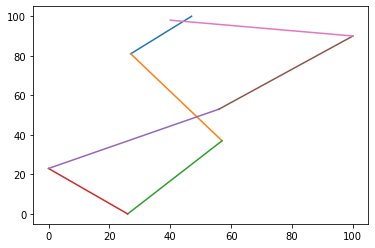

None


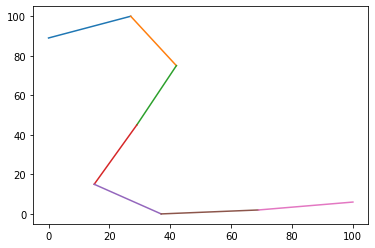

None


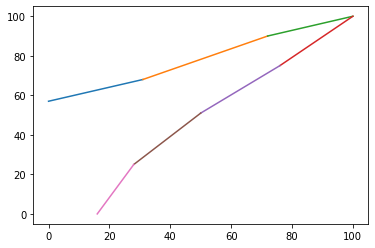

None


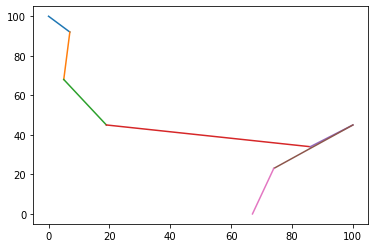

None


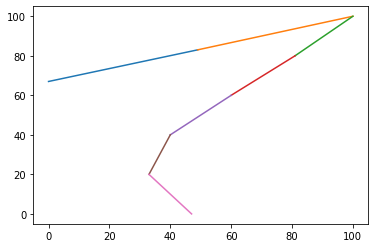

None


In [18]:
print(represente(0)) #label 8
print(represente(1)) #label 2
print(represente(2)) #label 1
print(represente(3)) #label 4
print(represente(4)) #label 1

### Visualisation des données

#### Réduction de données 16-D => 2D

[[ 0.18074264  0.11754863 -0.16373073 -0.5329954   0.04152023  0.54560639
   0.34065406 -0.08299738  0.09236442  0.28267796  0.26962819  0.09045689
  -0.2006627  -0.09886322  0.02803139  0.01155448]
 [ 0.39435471  0.15358139  0.03752916 -0.18421414 -0.02011339  0.02241599
  -0.13285612 -0.00918026 -0.62531895 -0.12334379  0.2185733  -0.38925566
   0.35298403  0.02930906 -0.15816659 -0.10443483]
 [ 0.19214373 -0.1755822   0.0405091  -0.2823012   0.27782242 -0.05803863
   0.15134203  0.65084036  0.22738056  0.07503826 -0.32206755 -0.02003299
   0.32485968  0.2017248  -0.1039368  -0.0733097 ]
 [ 0.39138957 -0.09574487  0.14131942 -0.22608209 -0.03060081  0.04913658
  -0.2373256  -0.06025975 -0.2194607  -0.18882191 -0.45957195  0.15772735
  -0.38262965  0.13722946  0.36056918  0.29683131]
 [ 0.23503408 -0.23801336  0.2578876   0.17483899  0.57325143 -0.2843133
   0.04670275  0.06379148 -0.08555818  0.26905197  0.34547564 -0.07547616
  -0.28350958 -0.26557172  0.10361422  0.09450407]
 [ 0.3

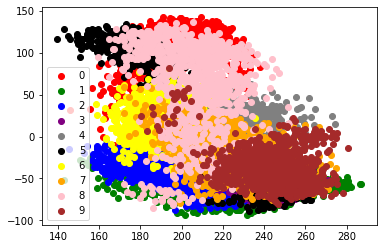

In [19]:
from itertools import cycle

# 1) calcul des vecteurs propres

lam, V = np.linalg.eig(Xdata.T@Xdata)

# 2) affichage (print)

print(V)
# 3) tri et sélection des 2 vecteurs associés aux 2 plus grandes valeurs propres
indexes_tries = np.argsort(lam)[::-1]
#print(indexes_tries)

V2_max = V[:, indexes_tries[:2]]

#print(main_V1,main_V2)

# 4) affichage (plot) avec un code couleur pour les classes
projected_data = Xdata.dot(V2_max)


#plt.scatter(projected_data[:,0], projected_data[:,1], label='Points de données', c=Yu[:200], cmap='viridis', marker='o')
colors = cycle(['red', 'green', 'blue', 'purple', 'grey', 'black', 'yellow', 'orange', 'pink', 'brown'])
for i, c in zip(range(len(np.unique(Ydata))), colors):
    class_data = projected_data[Ydata == i]
    plt.scatter(class_data[:, 0], class_data[:, 1], c=c, marker='o', label=f'Classe {i}')

# ####################################
plt.legend(np.arange(10))

#plt.savefig("out/proj_usps_all.png",bbox_inches='tight', transparent=True,pad_inches=0)

Observation : cette visualisation nous permet de se faire une idée de la sépartion des classes.

En d'autres termes on voit à quel point un chiffre manuscrit est distinguable par rapport aux autres. 

Par exemple, le 9 et le 0 semblent bien séparés entre eux tandis que le 1, 2 et 7 ont une certaine ressemblance.

Aucun chiffre ne semble parfaitement distinguable.

#### Visualisation avec le Package Seaborn

In [20]:
# Importation du package seaborn:
import seaborn as sns

In [21]:
# Créer un dataframe avec les descriptions et les labels

df_X = X.copy()
df_y = y.copy()
df_xy = pd.concat([df_X, df_y], axis=1)
df_xy = df_xy.head(1000) # prendre les 1000 premières lignes
df_xy

Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0            47         100          27          81          57          37   
1             0          89          27         100          42          75   
2             0          57          31          68          72          90   
3             0         100           7          92           5          68   
4             0          67          49          83         100         100   
..          ...         ...         ...         ...         ...         ...   
995          21         100          19          70          32         100   
996          25          89          62         100          65          78   
997           7          97          15          68          65          39   
998          56          80           5         100          10          65   
999          51          80          56         100         100          93   

     Attribute7  Attribute8  Attribute9  Attribute10  Attribute11  \
0            26           0           0           23           56   
1            29          45          15           15           37   
2           100         100          76           75           50   
3            19          45          86           34          100   
4            81          80          60           60           40   
..          ...         ...         ...          ...          ...   
995          45          52          63            7            0   
996          66          52         100           33           81   
997          31           0           0           25            4   
998          87          33          71            0            0   
999          82          53          45           20            0   

     Attribute12  Attribute13  Attribute14  Attribute15  Attribute16  Class  
0             53          100           90           40           98      8  
1              0           69            2          100            6      2  
2             51           28           25           16            0      1  
3             45           74           23           67            0      4  
4             40           33           20           47            0      1  
..           ...          ...          ...          ...          ...    ...  
995            0           34            8          100           13      1  
996            7           41            0            0            3      3  
997           77           33           97          100          100      5  
998           22           58           59          100           97      8  
999            0           42           10           94            1      2  

[1000 rows x 17 columns]

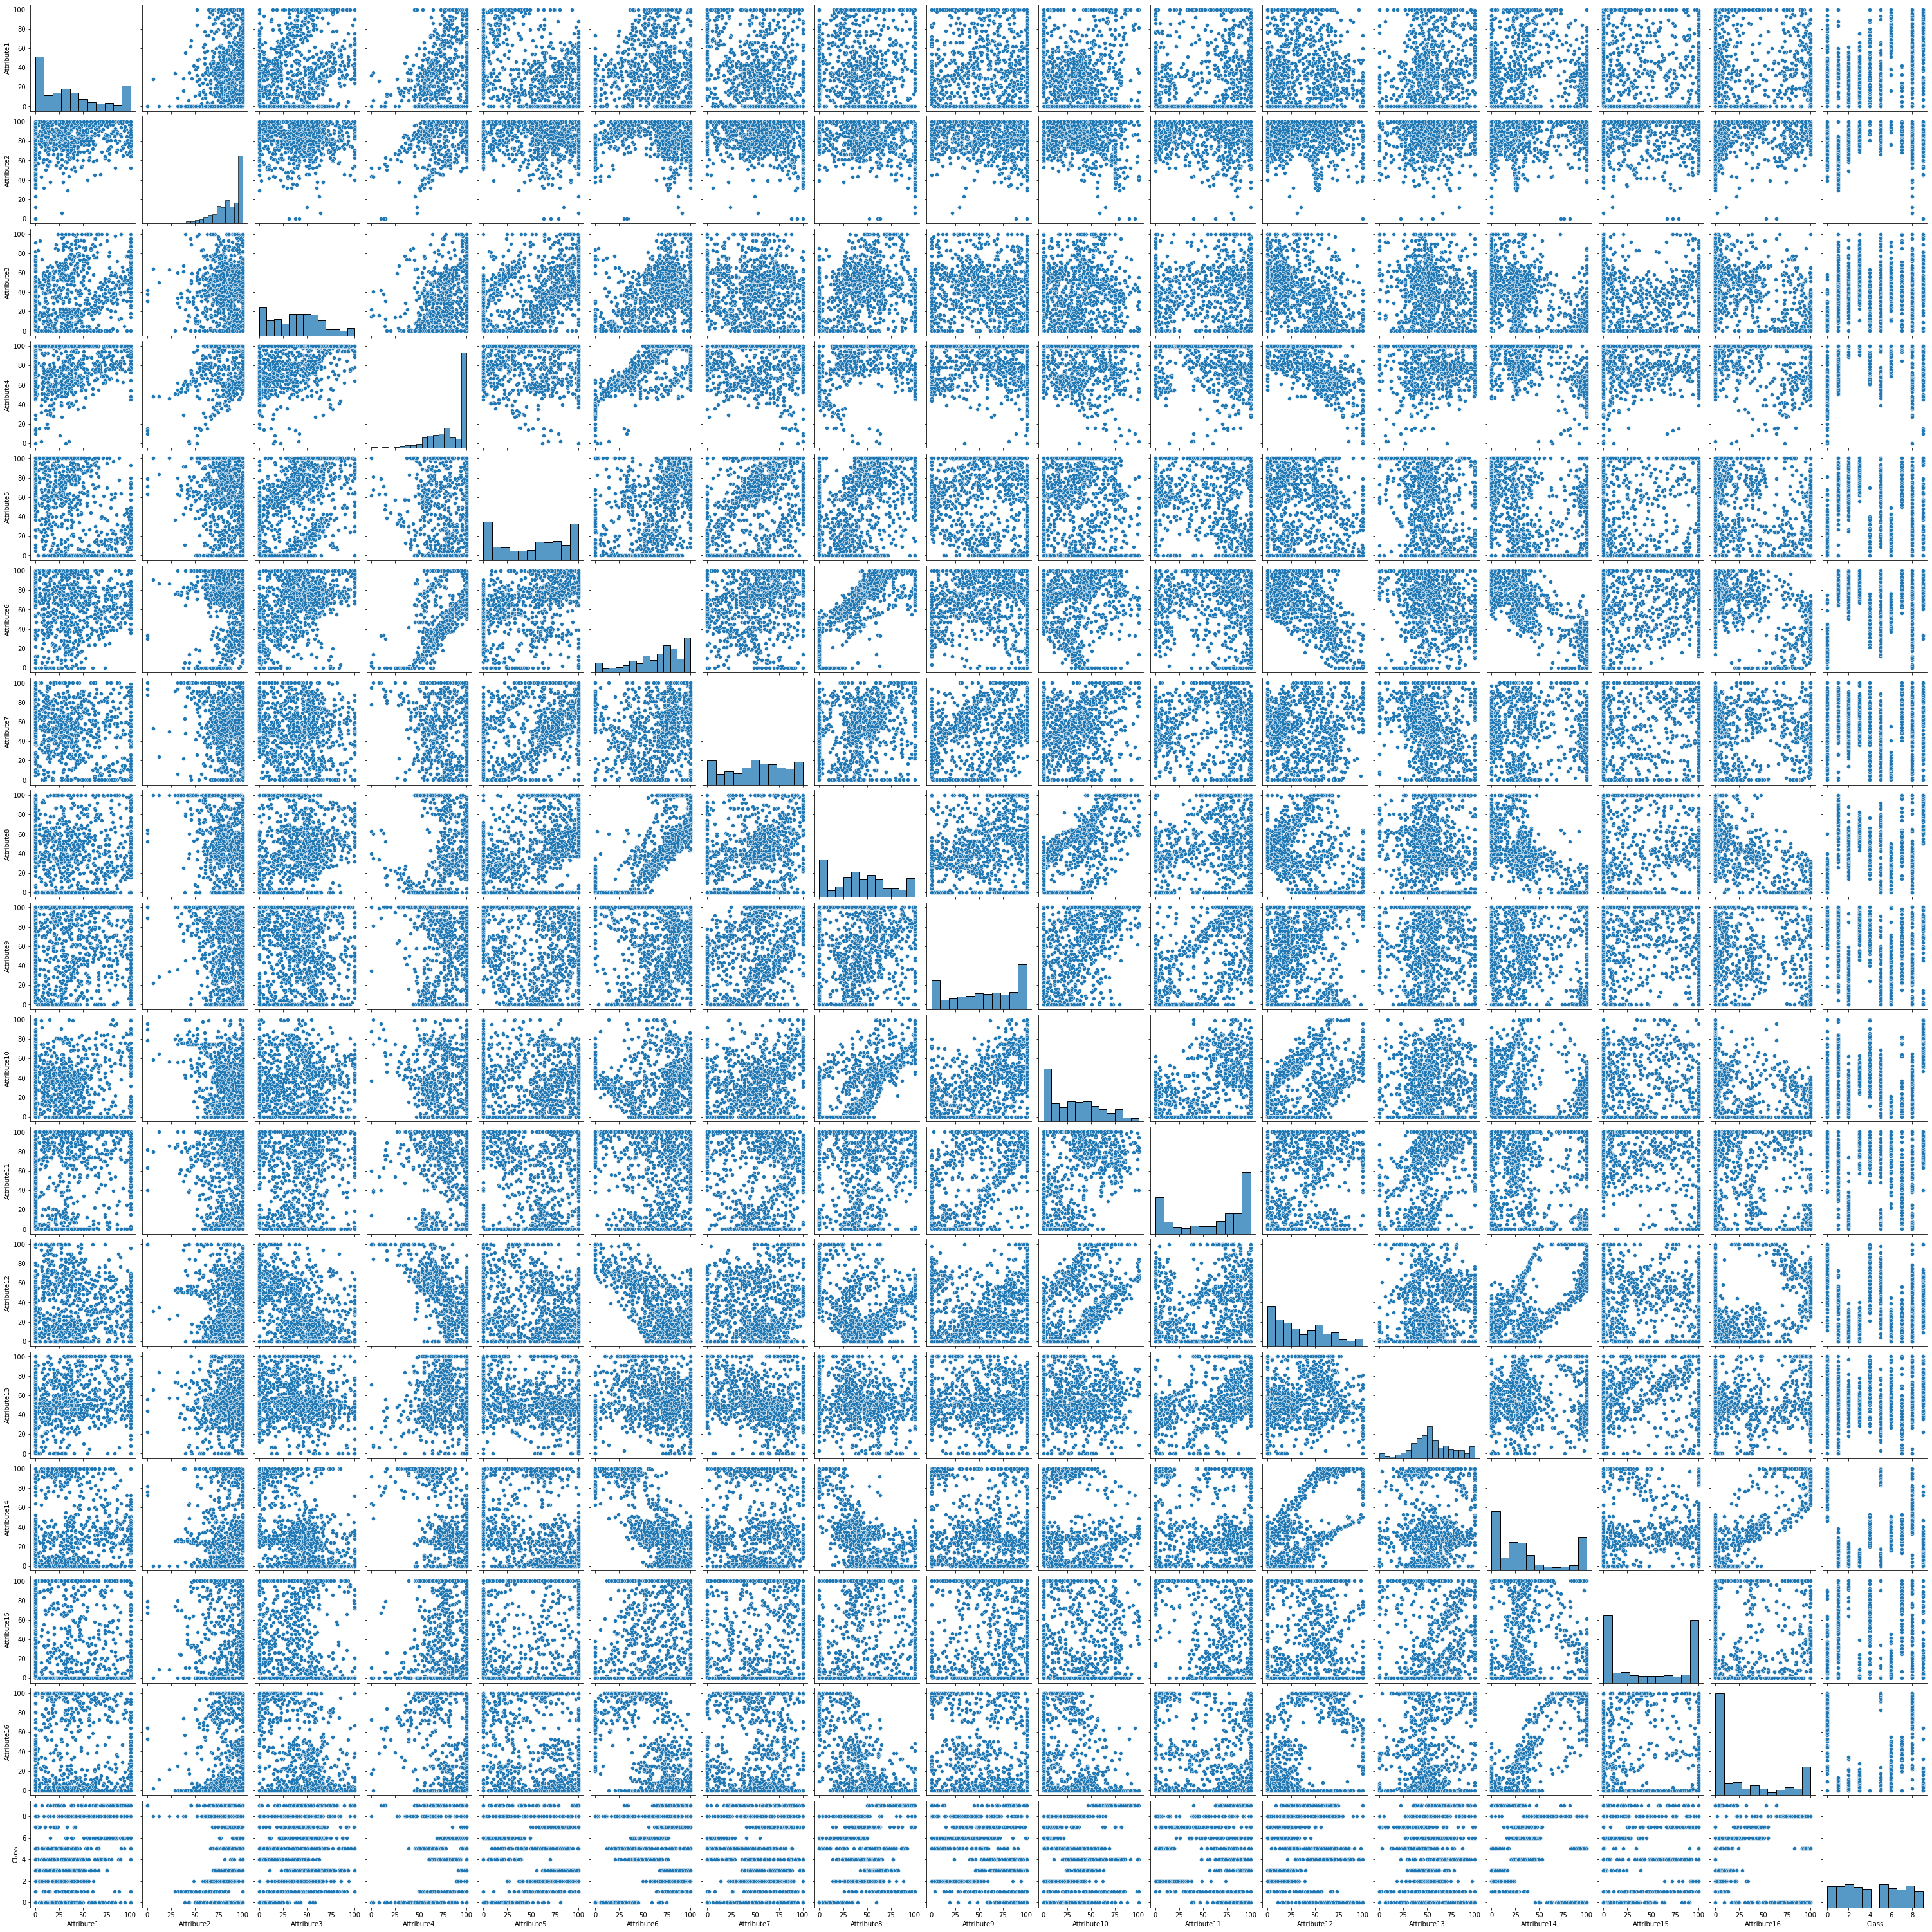

In [22]:
sns.pairplot(df_xy)

Observation : à priori rien d'intéressant ne ressort de l'utilisation de seaborn

### Variation des paramètres des modèles

#### K plus proches voisins : variation de k

In [23]:
np.random.seed(42)   # on prend 42 comme graine

listePerfsMoyKNN = []  #liste des performances moyennes des KNN avec k variant
listeTempsKNN = []

print("ATTENTION: cela peut être long !\n")

for nb_voisins in range (1,21) : 
    
    print("#############\névaluation à ", nb_voisins, " voisin(s)\n#############")

    # Nombre d'itérations voulues pour la validation croisée:
    nb_iter = 3

    # 1) créer le classifieur de base
    # Création d'un classifier KNN
    classKNN = classif.ClassifierKNN(16,nb_voisins)  # 16 dimensions car 16 attributs

    # 2) créér le classifieur multi-classes

    # Création de son équivalent multiclasses (car ce dataset en a 10)
    multiclassKNN = classif.ClassifierMultiOAA(classKNN)
    # ######################## 

    # Remarque: ici, on ne mélange pas les exemples avant la validation croisée A FAIRE

    # Evaluation du classifieur par validation croisée:
    tic = time.time()  # On lance le chrono
    perf, taux_moyen, taux_ecart = ev.validation_croisee(multiclassKNN, (Xdata, Ydata), nb_iter)
    toc = time.time()  # On arrête le chrono

    # Récupération des performances pour le KNN
    perfMoyenneKNN = taux_moyen
    tempsKNN = toc-tic
    listePerfsMoyKNN.append(perfMoyenneKNN)
    listeTempsKNN.append(tempsKNN)
"""
print(f'Temps passe: {(toc-tic):0.4f} secondes.')
print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}')"""

print(listePerfsMoyKNN)
print(listeTempsKNN)


ATTENTION: cela peut être long !

#############
évaluation à  1  voisin(s)
#############
Iteration :  0 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.99235807860262
Iteration :  1 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9926310043668122
Iteration :  2 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.978438864628821
#############
évaluation à  2  voisin(s)
#############
Iteration :  0 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9915393013100436
Iteration :  1 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9907205240174672
Iteration :  2 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9759825327510917
#############
évaluation à  3  voisin(s)
#############
Iteration :  0 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.99235807860262
Iteration :  1 taille base app.= 7328 taille base test= 3664 Taux de bonne cla

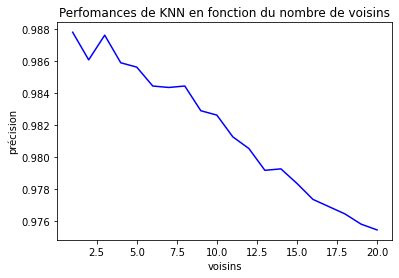

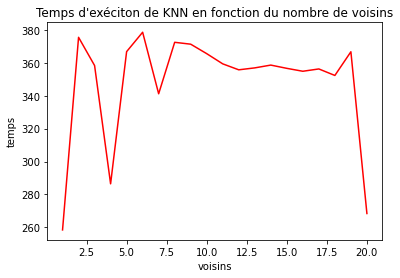

In [36]:
# Courbes des performances de chaque modèle
x1 = [i for i in range (1,21)]

y1 = listePerfsMoyKNN

y2 = listeTempsKNN

# Tracer la courbe
plt.plot(x1, y1, color='blue')


# Ajouter un titre
plt.title('Perfomances de KNN en fonction du nombre de voisins')

# Ajouter des étiquettes aux axes
plt.xlabel('voisins')
plt.ylabel('précision')

# Afficher la courbe
plt.show()

# Tracer la courbe
plt.plot(x1, y2, color='red')


# Ajouter un titre
plt.title("Temps d'exécution de KNN en fonction du nombre de voisins")

# Ajouter des étiquettes aux axes
plt.xlabel('voisins')
plt.ylabel('temps')

# Afficher la courbe
plt.show()

#### Perceptron : variation du learning rate

In [38]:
#Perceptron Biaisée

np.random.seed(42)   # on prend 42 comme graine
#CALCULER TEMPS DE CONVERGENCE EN FONCTION D'EPS


listePerfsMoyBiais = []  
listeTempsBiais = []

# Paramètres pour le perceptron:
dim = Xdata.shape[1]   # la dimension est donnée par le nombre de colonnes de Xdata
eps = 0.00001    # learning rate
poids_0 = True   # valeur initiale des poids à 0

print("ATTENTION: cela peut être long !\n")

for i in range (0,5) : 
    print("#############\névaluation à ", eps, " de learning rate\n#############")


    # Nombre d'itérations voulues pour la validation croisée:
    nb_iter = 3

    # ######################## A COMPLETER CI-DESSOUS
    # 1) créer le classifieur de base

    classBiais = classif.ClassifierPerceptronBiais(dim, eps, poids_0)

    # 2) créér le classifieur multi-classes

    multiclassBiais = classif.ClassifierMultiOAA(classBiais)

    # ######################## 

    # Remarque: ici, on ne mélange pas les exemples avant la validation croisée

    # Evaluation du classifieur par validation croisée:
    tic = time.time()  # On lance le chrono
    perf, taux_moyen, taux_ecart = ev.validation_croisee(multiclassBiais, (Xdata, Ydata), nb_iter)
    toc = time.time()  # On arrête le chrono

    # Récupération des performances pour le Perceptron Biais
    perfMoyenneBiais = taux_moyen
    tempsBiais = toc-tic
    listePerfsMoyBiais.append(perfMoyenneBiais)
    listeTempsBiais.append(tempsBiais)

    # augmentation de la valeur du learning rate
    eps *= 10
"""
print(f'Temps passe: {(toc-tic):0.4f} secondes.')
print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}')"""

print(listePerfsMoyBiais)
print(listeTempsBiais)

ATTENTION: cela peut être long !

#############
évaluation à  1e-05  de learning rate
#############
Iteration :  0 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9110262008733624
Iteration :  1 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.8741812227074236
Iteration :  2 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.8700873362445415
#############
évaluation à  0.0001  de learning rate
#############


C:\Users\abdal\Licence3Semestre2\LU3IN026\TME\iads2\Classifiers.py:325: RuntimeWarning: invalid value encountered in multiply
  self.w = self.w + (self.learning_rate*(yi-y_etoile)*xi)
C:\Users\abdal\Licence3Semestre2\LU3IN026\TME\iads2\Classifiers.py:256: RuntimeWarning: invalid value encountered in subtract
  if np.linalg.norm(self.w - w) < seuil :


Iteration :  0 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.10316593886462883
Iteration :  1 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.10534934497816593
Iteration :  2 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.10343886462882096
#############
évaluation à  0.001  de learning rate
#############
Iteration :  0 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.10316593886462883
Iteration :  1 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.10534934497816593
Iteration :  2 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.10343886462882096
#############
évaluation à  0.01  de learning rate
#############
Iteration :  0 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.10316593886462883
Iteration :  1 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.10534934497816593
Iteration :  2 taille base ap

C:\Users\abdal\Licence3Semestre2\LU3IN026\TME\iads2\Classifiers.py:325: RuntimeWarning: overflow encountered in multiply
  self.w = self.w + (self.learning_rate*(yi-y_etoile)*xi)


Iteration :  0 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.10316593886462883


C:\Users\abdal\Licence3Semestre2\LU3IN026\TME\iads2\Classifiers.py:325: RuntimeWarning: invalid value encountered in add
  self.w = self.w + (self.learning_rate*(yi-y_etoile)*xi)


Iteration :  1 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.10534934497816593
Iteration :  2 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.10343886462882096
[0.8850982532751092, 0.10398471615720524, 0.10398471615720524, 0.10398471615720524, 0.10398471615720524]
[180.01969456672668, 154.17187356948853, 154.19304990768433, 153.64095258712769, 154.11881947517395]


[1, 2, 3, 4, 5] 	 [0.8704537159237986, 0.8735443959243087, 0.8862798638581211, 0.89374530989155, 0.8801832198476283, 0.8884668024689999, 0.8837326142631852, 0.8888277505298782, 0.8878280066435019, 0.8989271816907087, 0.8981058690767184, 0.8884601671443406, 0.8857312232348017, 0.8889186196630295, 0.8941042437263899, 0.8911967664467189, 0.8975628079967861, 0.8820080142403558, 0.8909152727477088]


ValueError: x and y must have same first dimension, but have shapes (5,) and (19,)

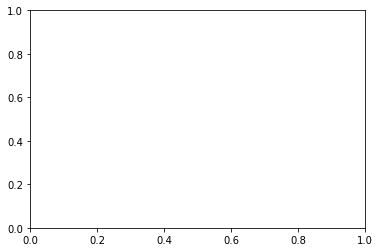

In [62]:
# Courbes des performances de chaque modèle
x1 = [i for i in range (1,6)]
y1 = listePerfsMoyBiais

y2 = listeTempsBiais

# Tracer la courbe
plt.plot(x1, y1, color='blue')


# Ajouter un titre
plt.title('Perfomances de Perceptron Biaisé en fonction du learning rate')

# Ajouter des étiquettes aux axes
plt.xlabel('learning rate')
plt.ylabel('précision')

# Afficher la courbe
plt.show()

# Tracer la courbe
plt.plot(x1, y2, color='red')


# Ajouter un titre
plt.title("Temps d'exécution de Perceptron Biaisé en fonction du learning rate")

# Ajouter des étiquettes aux axes
plt.xlabel('learning rate')
plt.ylabel('temps')

# Afficher la courbe
plt.show()

In [39]:
# Perceptron de Base

np.random.seed(42)   # on prend 42 comme graine
#CALCULER TEMPS DE CONVERGENCE EN FONCTION D'EPS


listePerfsMoyP = []  
listeTempsP = []

# Paramètres pour le perceptron:
dim = Xdata.shape[1]   # la dimension est donnée par le nombre de colonnes de Xdata
eps = 0.001    # learning rate
poids_0 = True   # valeur initiale des poids à 0

print("ATTENTION: cela peut être long !\n")

for i in range (0,3) : 
    print("#############\névaluation à ", eps, " de learning rate\n#############")


    # Nombre d'itérations voulues pour la validation croisée:
    nb_iter = 3

    # ######################## A COMPLETER CI-DESSOUS
    # 1) créer le classifieur de base

    classP = classif.ClassifierPerceptron(dim, eps, poids_0)

    # 2) créér le classifieur multi-classes

    multiclassP = classif.ClassifierMultiOAA(classP)

    # ######################## 

    # Remarque: ici, on ne mélange pas les exemples avant la validation croisée

    # Evaluation du classifieur par validation croisée:
    tic = time.time()  # On lance le chrono
    perf, taux_moyen, taux_ecart = ev.validation_croisee(multiclassP, (Xdata, Ydata), nb_iter)
    toc = time.time()  # On arrête le chrono

    # Récupération des performances pour le Perceptron Biais
    perfMoyenneP = taux_moyen
    tempsP = toc-tic
    listePerfsMoyP.append(perfMoyenneP)
    listeTempsP.append(tempsP)

    # augmentation de la valeur du learning rate
    eps *= 10
"""
print(f'Temps passe: {(toc-tic):0.4f} secondes.')
print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}')"""

print(listePerfsMoyP)
print(listeTempsP)

ATTENTION: cela peut être long !

Iteration :  0 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.8736353711790393
Iteration :  1 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.8916484716157205
Iteration :  2 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.8485262008733624
Iteration :  0 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.8992903930131004
Iteration :  1 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.8900109170305677
Iteration :  2 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.8449781659388647
Iteration :  0 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.8591703056768559
Iteration :  1 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.839792576419214
Iteration :  2 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.8097707423580786
[0.8712700145560408, 0.87809315

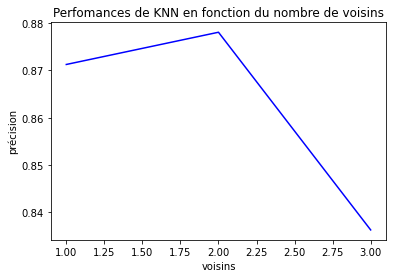

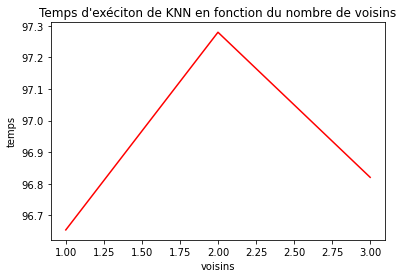

In [40]:
# Courbes des performances de chaque modèle
x1 = [i for i in range (1,4)]
y1 = listePerfsMoyP

y2 = listeTempsP

# Tracer la courbe
plt.plot(x1, y1, color='blue')


# Ajouter un titre
plt.title('Perfomances de Perceptron de base en fonction du learning rate')

# Ajouter des étiquettes aux axes
plt.xlabel('learning rate')
plt.ylabel('précision')

# Afficher la courbe
plt.show()

# Tracer la courbe
plt.plot(x1, y2, color='red')


# Ajouter un titre
plt.title("Temps d'exécution de Perceptron de base en fonction du learning rate")

# Ajouter des étiquettes aux axes
plt.xlabel('learning rate')
plt.ylabel('temps')

# Afficher la courbe
plt.show()

#### Arbre de décision : variation du seuil 

In [43]:
np.random.seed(42)   # on prend 42 comme graine

listePerfsMoyArbre = []  
listeTempsArbre = []

seuils = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9]

print("ATTENTION: cela peut être long !\n")

for s in seuils :
    print("#############\névaluation à ", s, " de seuil\n#############")

    
    arbre = classif.ClassifierArbreNumerique(len(attributs), s, attributs)

    # Nombre d'itérations voulues pour la validation croisée:
    nb_iter = 3

    # évalution du modèle avec la validation croisée
    tic = time.time()  # On lance le chrono
    (res_all, res_moy, res_sd) = ev.validation_croisee(arbre, (Xdata, Ydata), nb_iter)
    toc = time.time()  # On arrête le chrono

    # Récupération des performances pour l'arbre de décision numérique
    perfMoyenneArbre = res_moy
    tempsArbre = toc-tic
    listePerfsMoyArbre.append(perfMoyenneArbre)
    listeTempsArbre.append(tempsArbre)

# ################### 
"""
print(f'\nTemps passe: {(toc-tic):0.4f} secondes.')
print("\nValidation croisée sur les données avec comme seuil ",seuil)
print("Perf obtenues : ",res_all)
print(f'\nAccuracy moyenne: {res_moy:.3f}\técart type: {res_sd:.3f}')"""

print(listePerfsMoyArbre)
print(listeTempsArbre)

ATTENTION: cela peut être long !

Iteration :  0 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9440502183406113
Iteration :  1 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9445960698689956
Iteration :  2 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9042030567685589
Iteration :  0 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9372270742358079
Iteration :  1 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9405021834061136
Iteration :  2 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9031113537117904
Iteration :  0 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9012008733624454
Iteration :  1 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9001091703056768
Iteration :  2 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.8460698689956332
Iteration :  0 taille base app

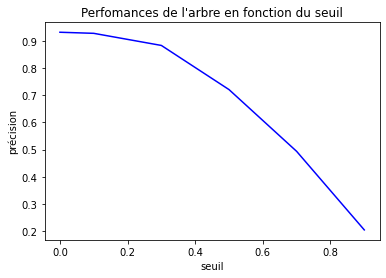

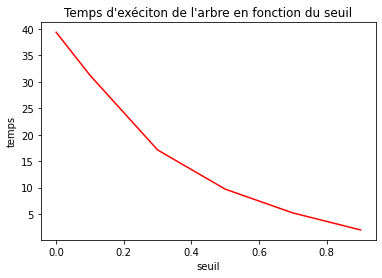

In [44]:
# Courbes des performances de chaque modèle
x1 = seuils
y1 = listePerfsMoyArbre

y2 = listeTempsArbre

# Tracer la courbe
plt.plot(x1, y1, color='blue')


# Ajouter un titre
plt.title("Perfomances de l'arbre en fonction du seuil")

# Ajouter des étiquettes aux axes
plt.xlabel('seuil')
plt.ylabel('précision')

# Afficher la courbe
plt.show()

# Tracer la courbe
plt.plot(x1, y2, color='red')


# Ajouter un titre
plt.title("Temps d'exécution de l'arbre en fonction du seuil")

# Ajouter des étiquettes aux axes
plt.xlabel('seuil')
plt.ylabel('temps')

# Afficher la courbe
plt.show()

#### Variation du nombre d'itérations dans la validation croisée

Les paramètres des modèles seront fixés

In [46]:
# KNN(4)

np.random.seed(42)   # on prend 42 comme graine

listePerfsMoyKNN = []  
listeTempsKNN = []

print("ATTENTION: cela peut être long !\n")

for nb_iter in range (2,21) : 
    print("#############\névaluation à ", nb_iter, " itération(s)\n#############")

    # 1) créer le classifieur de base
    # Création d'un classifier KNN
    classKNN = classif.ClassifierKNN(16,4)  # 16 dimensions car 16 attributs

    # 2) créér le classifieur multi-classes

    # Création de son équivalent multiclasses (car ce dataset en a 10)
    multiclassKNN = classif.ClassifierMultiOAA(classKNN)
    # ######################## 

    # Remarque: ici, on ne mélange pas les exemples avant la validation croisée A FAIRE

    # Evaluation du classifieur par validation croisée:
    tic = time.time()  # On lance le chrono
    perf, taux_moyen, taux_ecart = ev.validation_croisee(multiclassKNN, (Xdata, Ydata), nb_iter)
    toc = time.time()  # On arrête le chrono

    # Récupération des performances pour le KNN
    perfMoyenneKNN = taux_moyen
    tempsKNN = toc-tic
    listePerfsMoyKNN.append(perfMoyenneKNN)
    listeTempsKNN.append(tempsKNN)
"""
print(f'Temps passe: {(toc-tic):0.4f} secondes.')
print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}')"""

print(listePerfsMoyKNN)
print(listeTempsKNN)


ATTENTION: cela peut être long !

#############
évaluation à  2  itération(s)
#############
Iteration :  0 taille base app.= 5497 taille base test= 5495 Taux de bonne classif:  0.9832575068243858
Iteration :  1 taille base app.= 5495 taille base test= 5497 Taux de bonne classif:  0.9805348371839185
#############
évaluation à  3  itération(s)
#############
Iteration :  0 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.990174672489083
Iteration :  1 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9896288209606987
Iteration :  2 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9778930131004366
#############
évaluation à  4  itération(s)
#############
Iteration :  0 taille base app.= 8245 taille base test= 2747 Taux de bonne classif:  0.991991263196214
Iteration :  1 taille base app.= 8244 taille base test= 2748 Taux de bonne classif:  0.987627365356623
Iteration :  2 taille base app.= 8244 taille base test= 2748 Taux d

Iteration :  9 taille base app.= 10076 taille base test= 916 Taux de bonne classif:  0.99235807860262
Iteration :  10 taille base app.= 10076 taille base test= 916 Taux de bonne classif:  0.99235807860262
Iteration :  11 taille base app.= 10075 taille base test= 917 Taux de bonne classif:  0.990185387131952
#############
évaluation à  13  itération(s)
#############
Iteration :  0 taille base app.= 10148 taille base test= 844 Taux de bonne classif:  0.9928909952606635
Iteration :  1 taille base app.= 10146 taille base test= 846 Taux de bonne classif:  0.991725768321513
Iteration :  2 taille base app.= 10147 taille base test= 845 Taux de bonne classif:  0.9976331360946745
Iteration :  3 taille base app.= 10146 taille base test= 846 Taux de bonne classif:  0.9940898345153665
Iteration :  4 taille base app.= 10146 taille base test= 846 Taux de bonne classif:  0.9905437352245863
Iteration :  5 taille base app.= 10147 taille base test= 845 Taux de bonne classif:  0.9893491124260355
Iteration

Iteration :  15 taille base app.= 10346 taille base test= 646 Taux de bonne classif:  0.9953560371517027
Iteration :  16 taille base app.= 10344 taille base test= 648 Taux de bonne classif:  0.9907407407407407
#############
évaluation à  18  itération(s)
#############
Iteration :  0 taille base app.= 10382 taille base test= 610 Taux de bonne classif:  0.9901639344262295
Iteration :  1 taille base app.= 10381 taille base test= 611 Taux de bonne classif:  0.9967266775777414
Iteration :  2 taille base app.= 10382 taille base test= 610 Taux de bonne classif:  0.9918032786885246
Iteration :  3 taille base app.= 10381 taille base test= 611 Taux de bonne classif:  0.9967266775777414
Iteration :  4 taille base app.= 10382 taille base test= 610 Taux de bonne classif:  0.9918032786885246
Iteration :  5 taille base app.= 10380 taille base test= 612 Taux de bonne classif:  0.9950980392156863
Iteration :  6 taille base app.= 10382 taille base test= 610 Taux de bonne classif:  0.9918032786885246
Ite

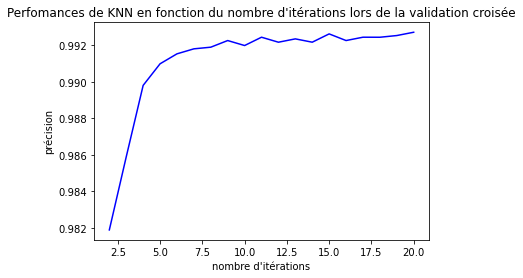

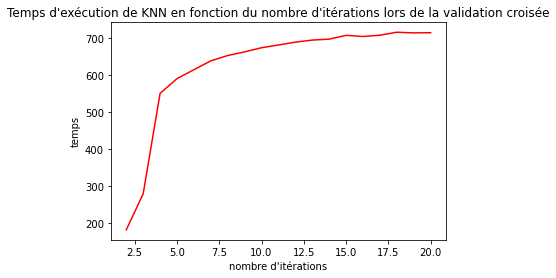

In [56]:
# Courbes des performances de chaque modèle
x1 = [i for i in range (2,21)]

y1 = listePerfsMoyKNN

y2 = listeTempsKNN

# Tracer la courbe
plt.plot(x1, y1, color='blue')


# Ajouter un titre
plt.title("Perfomances de KNN en fonction du nombre d'itérations lors de la validation croisée")

# Ajouter des étiquettes aux axes
plt.xlabel("nombre d'itérations")
plt.ylabel('précision')

# Afficher la courbe
plt.show()

# Tracer la courbe
plt.plot(x1, y2, color='red')


# Ajouter un titre
plt.title("Temps d'exécution de KNN en fonction du nombre d'itérations lors de la validation croisée")

# Ajouter des étiquettes aux axes
plt.xlabel("nombre d'itérations")
plt.ylabel('temps')

# Afficher la courbe
plt.show()

In [49]:
# Perceptron Biaisé

np.random.seed(42)   # on prend 42 comme graine
#CALCULER TEMPS DE CONVERGENCE EN FONCTION D'EPS

listePerfsMoyBiais = []  
listeTempsBiais = []

# Paramètres pour le perceptron:
dim = Xdata.shape[1]   # la dimension est donnée par le nombre de colonnes de Xdata
eps = 0.00001    # learning rate
poids_0 = True   # valeur initiale des poids à 0

print("ATTENTION: cela peut être long !\n")

for nb_iter in range (2,21) : 
    print("#############\névaluation à ", nb_iter, " itération(s)\n#############")
    
    # ######################## A COMPLETER CI-DESSOUS
    # 1) créer le classifieur de base

    classBiais = classif.ClassifierPerceptronBiais(dim, eps, poids_0)

    # 2) créér le classifieur multi-classes

    multiclassBiais = classif.ClassifierMultiOAA(classBiais)

    # ######################## 

    # Remarque: ici, on ne mélange pas les exemples avant la validation croisée

    # Evaluation du classifieur par validation croisée:
    tic = time.time()  # On lance le chrono
    perf, taux_moyen, taux_ecart = ev.validation_croisee(multiclassBiais, (Xdata, Ydata), nb_iter)
    toc = time.time()  # On arrête le chrono

    # Récupération des performances pour le Perceptron Biais
    perfMoyenneBiais = taux_moyen
    tempsBiais = toc-tic
    listePerfsMoyBiais.append(perfMoyenneBiais)
    listeTempsBiais.append(tempsBiais)

"""
print(f'Temps passe: {(toc-tic):0.4f} secondes.')
print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}')"""

print(listePerfsMoyBiais)
print(listeTempsBiais)

ATTENTION: cela peut être long !

#############
évaluation à  2  itération(s)
#############
Iteration :  0 taille base app.= 5497 taille base test= 5495 Taux de bonne classif:  0.8840764331210191
Iteration :  1 taille base app.= 5495 taille base test= 5497 Taux de bonne classif:  0.8568309987265781
#############
évaluation à  3  itération(s)
#############
Iteration :  0 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.8326965065502183
Iteration :  1 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9137554585152838
Iteration :  2 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.8741812227074236
#############
évaluation à  4  itération(s)
#############
Iteration :  0 taille base app.= 8245 taille base test= 2747 Taux de bonne classif:  0.8682198762286131
Iteration :  1 taille base app.= 8244 taille base test= 2748 Taux de bonne classif:  0.886098981077147
Iteration :  2 taille base app.= 8244 taille base test= 2748 Taux

Iteration :  8 taille base app.= 10077 taille base test= 915 Taux de bonne classif:  0.8808743169398907
Iteration :  9 taille base app.= 10076 taille base test= 916 Taux de bonne classif:  0.8580786026200873
Iteration :  10 taille base app.= 10076 taille base test= 916 Taux de bonne classif:  0.8766375545851528
Iteration :  11 taille base app.= 10075 taille base test= 917 Taux de bonne classif:  0.8865866957470011
#############
évaluation à  13  itération(s)
#############
Iteration :  0 taille base app.= 10148 taille base test= 844 Taux de bonne classif:  0.8779620853080569
Iteration :  1 taille base app.= 10146 taille base test= 846 Taux de bonne classif:  0.9219858156028369
Iteration :  2 taille base app.= 10147 taille base test= 845 Taux de bonne classif:  0.906508875739645
Iteration :  3 taille base app.= 10146 taille base test= 846 Taux de bonne classif:  0.9219858156028369
Iteration :  4 taille base app.= 10146 taille base test= 846 Taux de bonne classif:  0.9219858156028369
Iter

Iteration :  14 taille base app.= 10345 taille base test= 647 Taux de bonne classif:  0.8809891808346213
Iteration :  15 taille base app.= 10346 taille base test= 646 Taux de bonne classif:  0.8777089783281734
Iteration :  16 taille base app.= 10344 taille base test= 648 Taux de bonne classif:  0.8796296296296297
#############
évaluation à  18  itération(s)
#############
Iteration :  0 taille base app.= 10382 taille base test= 610 Taux de bonne classif:  0.9147540983606557
Iteration :  1 taille base app.= 10381 taille base test= 611 Taux de bonne classif:  0.8919803600654664
Iteration :  2 taille base app.= 10382 taille base test= 610 Taux de bonne classif:  0.9081967213114754
Iteration :  3 taille base app.= 10381 taille base test= 611 Taux de bonne classif:  0.9099836333878887
Iteration :  4 taille base app.= 10382 taille base test= 610 Taux de bonne classif:  0.9147540983606557
Iteration :  5 taille base app.= 10380 taille base test= 612 Taux de bonne classif:  0.9084967320261438
It

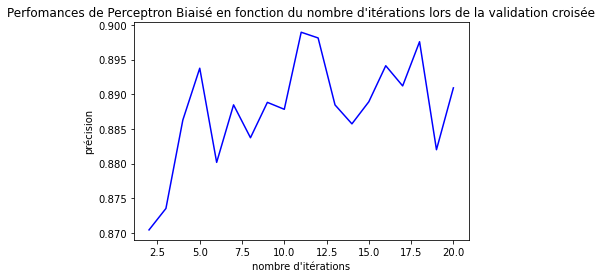

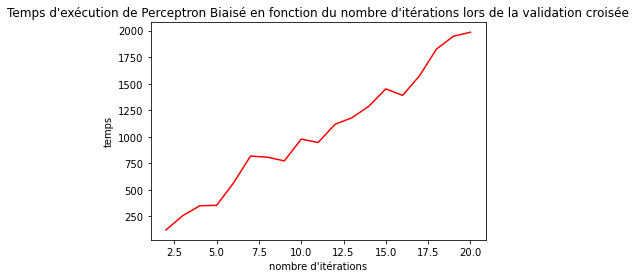

In [57]:
# Courbes des performances de chaque modèle
x1 = [i for i in range (2,21)]

y1 = listePerfsMoyBiais

y2 = listeTempsBiais

# Tracer la courbe
plt.plot(x1, y1, color='blue')


# Ajouter un titre
plt.title("Perfomances de Perceptron Biaisé en fonction du nombre d'itérations lors de la validation croisée")

# Ajouter des étiquettes aux axes
plt.xlabel("nombre d'itérations")
plt.ylabel('précision')

# Afficher la courbe
plt.show()

# Tracer la courbe
plt.plot(x1, y2, color='red')


# Ajouter un titre
plt.title("Temps d'exécution de Perceptron Biaisé en fonction du nombre d'itérations lors de la validation croisée")

# Ajouter des étiquettes aux axes
plt.xlabel("nombre d'itérations")
plt.ylabel('temps')

# Afficher la courbe
plt.show()

Note : pour le perceptron de base et l'arbre, la validation croisée n'ira que jusqu'à 9 itérations (par manque de temps)

In [51]:
# Perceptron de Base

np.random.seed(42)   # on prend 42 comme graine
#CALCULER TEMPS DE CONVERGENCE EN FONCTION D'EPS

listePerfsMoyP = []  
listeTempsP = []

# Paramètres pour le perceptron:
dim = Xdata.shape[1]   # la dimension est donnée par le nombre de colonnes de Xdata
eps = 0.001    # learning rate
poids_0 = True   # valeur initiale des poids à 0

print("ATTENTION: cela peut être long !\n")

for nb_iter in range (2,10) : 
    print("#############\névaluation à ", nb_iter, " itération(s)\n#############")

    # ######################## A COMPLETER CI-DESSOUS
    # 1) créer le classifieur de base

    classP = classif.ClassifierPerceptron(dim, eps, poids_0)

    # 2) créér le classifieur multi-classes

    multiclassP = classif.ClassifierMultiOAA(classP)

    # ######################## 

    # Remarque: ici, on ne mélange pas les exemples avant la validation croisée

    # Evaluation du classifieur par validation croisée:
    tic = time.time()  # On lance le chrono
    perf, taux_moyen, taux_ecart = ev.validation_croisee(multiclassP, (Xdata, Ydata), nb_iter)
    toc = time.time()  # On arrête le chrono

    # Récupération des performances pour le Perceptron Biais
    perfMoyenneP = taux_moyen
    tempsP = toc-tic
    listePerfsMoyP.append(perfMoyenneP)
    listeTempsP.append(tempsP)

"""
print(f'Temps passe: {(toc-tic):0.4f} secondes.')
print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}')"""

print(listePerfsMoyP)
print(listeTempsP)

ATTENTION: cela peut être long !

#############
évaluation à  2  itération(s)
#############
Iteration :  0 taille base app.= 5497 taille base test= 5495 Taux de bonne classif:  0.8849863512283894
Iteration :  1 taille base app.= 5495 taille base test= 5497 Taux de bonne classif:  0.877023831180644
#############
évaluation à  3  itération(s)
#############
Iteration :  0 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.8777292576419214
Iteration :  1 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.8670851528384279
Iteration :  2 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.8550764192139738
#############
évaluation à  4  itération(s)
#############
Iteration :  0 taille base app.= 8245 taille base test= 2747 Taux de bonne classif:  0.872224244630506
Iteration :  1 taille base app.= 8244 taille base test= 2748 Taux de bonne classif:  0.9042940320232896
Iteration :  2 taille base app.= 8244 taille base test= 2748 Taux 

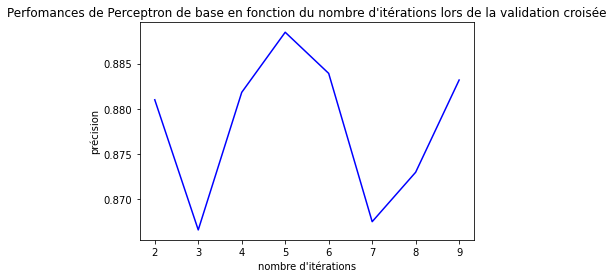

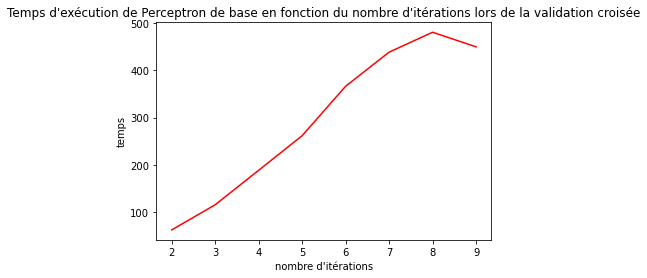

In [58]:
# Courbes des performances de chaque modèle
x1 = [i for i in range (2,10)]

y1 = listePerfsMoyP

y2 = listeTempsP

# Tracer la courbe
plt.plot(x1, y1, color='blue')


# Ajouter un titre
plt.title("Perfomances de Perceptron de base en fonction du nombre d'itérations lors de la validation croisée")

# Ajouter des étiquettes aux axes
plt.xlabel("nombre d'itérations")
plt.ylabel('précision')

# Afficher la courbe
plt.show()

# Tracer la courbe
plt.plot(x1, y2, color='red')


# Ajouter un titre
plt.title("Temps d'exécution de Perceptron de base en fonction du nombre d'itérations lors de la validation croisée")

# Ajouter des étiquettes aux axes
plt.xlabel("nombre d'itérations")
plt.ylabel('temps')

# Afficher la courbe
plt.show()

In [54]:
# Arbre de décison

np.random.seed(42)   # on prend 42 comme graine

listePerfsMoyArbre = []  
listeTempsArbre = []

seuil = 0.0

print("ATTENTION: cela peut être long !\n")

for nb_iter in range (2,10) :
    print("#############\névaluation à ", nb_iter, " itération(s)\n#############")

    
    arbre = classif.ClassifierArbreNumerique(len(attributs), seuil, attributs)

    # évalution du modèle avec la validation croisée
    tic = time.time()  # On lance le chrono
    (res_all, res_moy, res_sd) = ev.validation_croisee(arbre, (Xdata, Ydata), nb_iter)
    toc = time.time()  # On arrête le chrono

    # Récupération des performances pour l'arbre de décision numérique
    perfMoyenneArbre = res_moy
    tempsArbre = toc-tic
    listePerfsMoyArbre.append(perfMoyenneArbre)
    listeTempsArbre.append(tempsArbre)

# ################### 
"""
print(f'\nTemps passe: {(toc-tic):0.4f} secondes.')
print("\nValidation croisée sur les données avec comme seuil ",seuil)
print("Perf obtenues : ",res_all)
print(f'\nAccuracy moyenne: {res_moy:.3f}\técart type: {res_sd:.3f}')"""

print(listePerfsMoyArbre)
print(listeTempsArbre)

ATTENTION: cela peut être long !

#############
évaluation à  2  itération(s)
#############
Iteration :  0 taille base app.= 5497 taille base test= 5495 Taux de bonne classif:  0.9202911737943585
Iteration :  1 taille base app.= 5495 taille base test= 5497 Taux de bonne classif:  0.9154084045843187
#############
évaluation à  3  itération(s)
#############
Iteration :  0 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9440502183406113
Iteration :  1 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9445960698689956
Iteration :  2 taille base app.= 7328 taille base test= 3664 Taux de bonne classif:  0.9042030567685589
#############
évaluation à  4  itération(s)
#############
Iteration :  0 taille base app.= 8245 taille base test= 2747 Taux de bonne classif:  0.9410265744448489
Iteration :  1 taille base app.= 8244 taille base test= 2748 Taux de bonne classif:  0.9475982532751092
Iteration :  2 taille base app.= 8244 taille base test= 2748 Tau

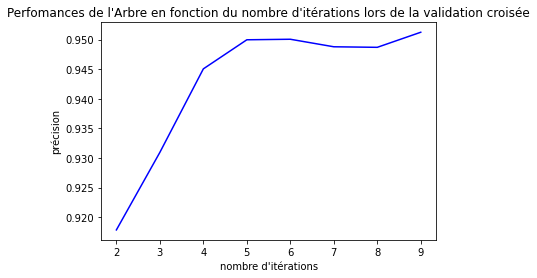

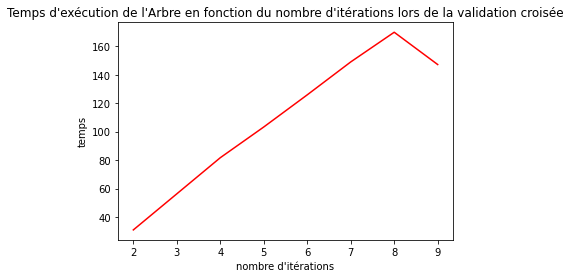

In [59]:
# Courbes des performances de chaque modèle
x1 = [i for i in range (2,10)]

y1 = listePerfsMoyArbre

y2 = listeTempsArbre

# Tracer la courbe
plt.plot(x1, y1, color='blue')


# Ajouter un titre
plt.title("Perfomances de l'Arbre en fonction du nombre d'itérations lors de la validation croisée")

# Ajouter des étiquettes aux axes
plt.xlabel("nombre d'itérations")
plt.ylabel('précision')

# Afficher la courbe
plt.show()

# Tracer la courbe
plt.plot(x1, y2, color='red')


# Ajouter un titre
plt.title("Temps d'exécution de l'Arbre en fonction du nombre d'itérations lors de la validation croisée")

# Ajouter des étiquettes aux axes
plt.xlabel("nombre d'itérations")
plt.ylabel('temps')

# Afficher la courbe
plt.show()

### Nouvelle comparaison des modèles

#### Vitesse des modèles

(par rapport au nombre d'itérations de la validation croisée)

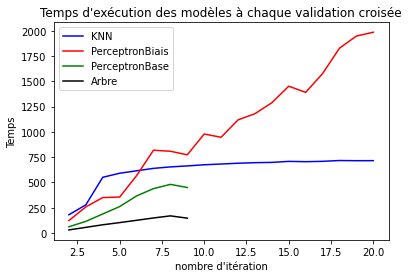

In [64]:
# Courbes des performances de chaque modèle
x1 = [i for i in range (2,21)]
x2 = [i for i in range (2, 10)]

y1 = listeTempsKNN

y2 = listeTempsBiais

y3 = listeTempsP

y4 = listeTempsArbre

# Tracer la courbe
plt.plot(x1, y1, color='blue', label='KNN')
plt.plot(x1, y2, color='red', label='PerceptronBiais')
plt.plot(x2, y3, color='green', label='PerceptronBase')
plt.plot(x2, y4, color='black', label='Arbre')

# Ajouter un titre
plt.title("Temps d'exécution des modèles à chaque validation croisée")

# Ajouter des étiquettes aux axes
plt.xlabel("nombre d'itération")
plt.ylabel('Temps')

# Ajouter une légende
plt.legend()

# Afficher la courbe
plt.show()

Observation : le temps d'exécution de Perceptron Biais augmente de manière linéaire tandis que les autres modèles voient leur temps d'exécution croître de manière logarithmique.

#### Performance des modèles

(par rapport au nombre d'itérations de la validation croisée)

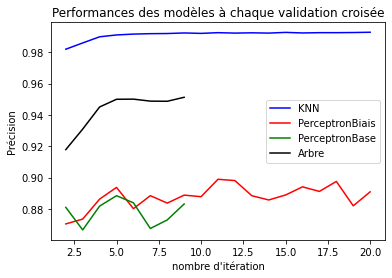

In [66]:
# Courbes des performances de chaque modèle
x1 = [i for i in range (2,21)]
x2 = [i for i in range (2, 10)]

y1 = listePerfsMoyKNN

y2 = listePerfsMoyBiais

y3 = listePerfsMoyP

y4 = listePerfsMoyArbre

# Tracer la courbe
plt.plot(x1, y1, color='blue', label='KNN')
plt.plot(x1, y2, color='red', label='PerceptronBiais')
plt.plot(x2, y3, color='green', label='PerceptronBase')
plt.plot(x2, y4, color='black', label='Arbre')

# Ajouter un titre
plt.title("Performances des modèles à chaque validation croisée")

# Ajouter des étiquettes aux axes
plt.xlabel("nombre d'itération")
plt.ylabel('Précision')

# Ajouter une légende
plt.legend()

# Afficher la courbe
plt.show()

Observation : KNN possède la plus grande précision, peu importe le nombre d'itérations de sa validation croisée.

Les perceptrons ont une précision variable selon le nombre d'itérations mais reste autour de 0.88 environ

#### Efficacité (Performance par rapport à la vitesse d'éxecution)

(par rapport au nombre d'itérations de la validation croisée)

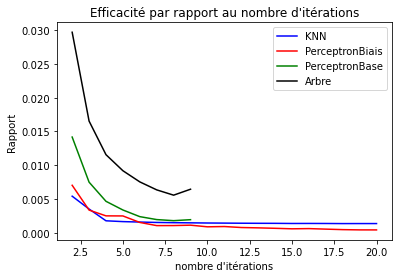

In [70]:
rapportKNN = [x / y for x, y in zip(listePerfsMoyKNN,listeTempsKNN)]#listePerfsMoyKNN / listeTempsKNN
rapportBiais = [x / y for x, y in zip(listePerfsMoyBiais,listeTempsBiais)]#listePerfsMoyBiais / listeTempsBiais
rapportP = [x / y for x, y in zip(listePerfsMoyP,listeTempsP)]#listePerfsMoyP / listeTempsP
rapportArbre = [x / y for x, y in zip(listePerfsMoyArbre,listeTempsArbre)]#listePerfsMoyArbre / listeTempsArbre

x1 = [i for i in range (2,21)]
x2 = [i for i in range (2, 10)]

# Tracer la courbe
plt.plot(x1, rapportKNN, color='blue', label='KNN')
plt.plot(x1, rapportBiais, color='red', label='PerceptronBiais')
plt.plot(x2, rapportP, color='green', label='PerceptronBase')
plt.plot(x2, rapportArbre, color='black', label='Arbre')

# Ajout de labels et de titres
plt.xlabel("nombre d'itérations")
plt.ylabel('Rapport')
plt.title("Efficacité par rapport au nombre d'itérations")

# Ajouter une légende
plt.legend()

# Affichage de l'histogramme
plt.show()

Observation : l'arbre de décision est le modèle possédant la meilleure efficacité.

Tous les modèles ont une efficacité décroissante avec l'augmentation du nombre d'itérations de validation croisée.

## Conclusion

### Modèle à choisir

Le modèle le plus approprié dans le cadre de la reconnaissance de chiffres manuscrits dépend des contraintes et exigences :

    - Avec peu d'exemples à traiter, on peut vouloir un modèle avec une précision optimale, au dépend de sa vitesse d'exécution qui posera moins de problème -> le modèle 'K plus proches voisins' sera le meilleur choix.
    - Avec un grand nombre d'exemples, on privilégiera un modèle rapide, quitte à rogner sur sa précision -> l'arbre de décision sera donc le meilleur choix.
    
On remarque que l'arbre de décision bénéficie de la meilleure efficacité, c'est-à-dire du meilleur rapport entre précision et temps d'exécution. On peut donc le considérer comme le modèle à adopter par défaut sans connaissance préalable du nombre d'exemples de chiffres manuscrits ou sans exigence spécifique de précision. L'arbre de décision est par ailleurs un modèle dont l'interprétation et l'explication à des personnes non initiées est facilitée par rapport à d'autres modèles comme le perceptron. 

### Pistes d'expérimentations complémentaires

1 - La répartiton des ensembles de données d'entrainement et de test a été testé sur des modèles avec des paramètres fixés. Ces expérimentations peuvent être reproduites en variant ces paramètres afin de trouver les paramètres optimaux pour chaque modèle (différents k pour KNN, différents learning rate pour les Perceptrons et différents seuils pour l'arbre de décision).

2 - L'utilisation de la mémoire peut être évalué. Cela peut aider à choisir un modèle si on a des contraintes matérielles (CPU/GPU).

3 - L'implémentation d'une matrice de confusion afin d'évaluer la sensibilité et la spécificité des modèles. On peut ainsi identifier les chiffres pour lesquels le modèle est le plus performant et ceux pour lesquels il a plus de difficultés.